In [1]:
library(data.table)
library(dplyr)
library(stringr)
library(ggplot2)


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:data.table’:

    between, first, last


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
variant <- fread("variant_with_maf_new.csv")
variant <- variant[variant$rare==TRUE,]
head(variant)

Identifier,sampleID,frequency,dbSNP id (g),Gene name (d),Entrez gene id (e),Chromosome (f),Start (f),End (f),Cytoband (f),AA Impact (h),1000 Genome (i),ESP5400 (j),SIFT Score (k),SNP Type (l),Polyphen (m),Variant class (n),AF,rare
<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<lgl>
chr10:100010849_G_A,ME:SK-MEL-2,45.238,-,LOXL4,84171,10,100010849,100010849,10q24,R725W,0,0.00000,0.00,Missense,1.000,Type 2,1e-06,TRUE
chr10:100013418_T_G,ME:SK-MEL-2,56.140,rs148260647,LOXL4,84171,10,100013418,100013418,10q24,Y576S,0,0.00019,0.32,Missense,1.000,Type 1,6e-05,TRUE
chr10:100017532_G_T,LC:EKVX,82.456,-,LOXL4,84171,10,100017532,100017532,10q24,R379S,0,0.00000,0.04,Missense,0.999,Type 2,9e-03,TRUE
chr10:100020867_C_A,CO:HCT-15,38.889,-,LOXL4,84171,10,100020867,100020867,10q24,E158D,0,0.00000,0.53,Missense,0.956,Type 2,1e-06,TRUE
chr10:100021911_C_T,BR:MCF7,29.508,rs139735732,LOXL4,84171,10,100021911,100021911,10q24,G113R,0,0.00019,0.58,Missense,0.000,Type 1,2e-04,TRUE
chr10:100167409_A_C,CO:HCC-2998,44.000,-,PYROXD2,84795,10,100167409,100167409,10q24.2,F82C,0,0.00000,0.00,Missense,0.999,Type 2,1e-06,TRUE


In [3]:
variant$sampleID <- variant$sampleID %>%
  strsplit( ":")  %>%
  sapply( tail, 1 ) %>%
  str_replace_all("-","")%>%
  str_replace_all(" ","")%>%
  str_replace("(TB)","")%>%
  str_replace("UO31","U031")%>%
  str_replace_all('\\(|\\)', "")%>%
  str_replace_all("A549/ATCC","A549")%>%
  str_replace_all("7860","X786O")%>%
  str_replace_all("MDAN","MDAMB468")%>%
  str_replace_all("NCI/ADRRES","NCIADRES")

In [4]:
head(variant)

Identifier,sampleID,frequency,dbSNP id (g),Gene name (d),Entrez gene id (e),Chromosome (f),Start (f),End (f),Cytoband (f),AA Impact (h),1000 Genome (i),ESP5400 (j),SIFT Score (k),SNP Type (l),Polyphen (m),Variant class (n),AF,rare
<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<lgl>
chr10:100010849_G_A,SKMEL2,45.238,-,LOXL4,84171,10,100010849,100010849,10q24,R725W,0,0.00000,0.00,Missense,1.000,Type 2,1e-06,TRUE
chr10:100013418_T_G,SKMEL2,56.140,rs148260647,LOXL4,84171,10,100013418,100013418,10q24,Y576S,0,0.00019,0.32,Missense,1.000,Type 1,6e-05,TRUE
chr10:100017532_G_T,EKVX,82.456,-,LOXL4,84171,10,100017532,100017532,10q24,R379S,0,0.00000,0.04,Missense,0.999,Type 2,9e-03,TRUE
chr10:100020867_C_A,HCT15,38.889,-,LOXL4,84171,10,100020867,100020867,10q24,E158D,0,0.00000,0.53,Missense,0.956,Type 2,1e-06,TRUE
chr10:100021911_C_T,MCF7,29.508,rs139735732,LOXL4,84171,10,100021911,100021911,10q24,G113R,0,0.00019,0.58,Missense,0.000,Type 1,2e-04,TRUE
chr10:100167409_A_C,HCC2998,44.000,-,PYROXD2,84795,10,100167409,100167409,10q24.2,F82C,0,0.00000,0.00,Missense,0.999,Type 2,1e-06,TRUE


In [5]:
variant <- variant[,c(1,2,5)]
colnames(variant)[3] <- "geneID"
head(variant)


Identifier,sampleID,geneID
<chr>,<chr>,<chr>
chr10:100010849_G_A,SKMEL2,LOXL4
chr10:100013418_T_G,SKMEL2,LOXL4
chr10:100017532_G_T,EKVX,LOXL4
chr10:100020867_C_A,HCT15,LOXL4
chr10:100021911_C_T,MCF7,LOXL4
chr10:100167409_A_C,HCC2998,PYROXD2


In [6]:
prot <- fread("proteinGroups.txt")
prot <- prot[,c(1,7)]
colnames(prot)[1] <- 'featureID'
prot$geneID <- lapply(prot$`Gene names`, function(x){
    strsplit(x,";")[[1]][1]
})
prot$geneID <- as.character(prot$geneID)
head(prot)

featureID,Gene names,geneID
<chr>,<chr>,<chr>
P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37,PPIAL4E;PPIAL4A;PPIAL4D;PPIAL4C,PPIAL4E
A0A0B4J2F0,PIGBOS1,PIGBOS1
A0A0C4DH73,IGKV1-12,IGKV1-12
A0A5B9;P01850,TRBC2;TRBC1,TRBC2
A0AV96;A0AV96-2,RBM47,RBM47
A0AVF1;A0AVF1-2;A0AVF1-3,TTC26,TTC26


In [7]:
variant_prot <- merge(variant, prot[,-2])
head(variant_prot)
nrow(variant_prot)

geneID,Identifier,sampleID,featureID
<chr>,<chr>,<chr>,<chr>
A1CF,chr10:52566602_C_A,RPMI8226,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
A1CF,chr10:52569690_T_G,MDAMB435,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
A1CF,chr10:52569690_T_G,MDAMB468,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
A1CF,chr10:52575948_C_A,MOLT4,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
A1CF,chr10:52580356_T_C,DU145,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4
A1CF,chr10:52587972_C_A,DU145,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4


[1] 39844

In [8]:
prot_samp_withRare <- variant_prot[,-c(1:2)]
prot_samp_withRare  <- prot_samp_withRare[!duplicated(prot_samp_withRare),]
prot_samp_withRare$rare <- 1
head(prot_samp_withRare)
nrow(prot_samp_withRare)

sampleID,featureID,rare
<chr>,<chr>,<dbl>
RPMI8226,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4,1
MDAMB435,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4,1
MDAMB468,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4,1
MOLT4,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4,1
DU145,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4,1
LOXIMVI,Q9NQ94-6;Q9NQ94;Q9NQ94-2;Q9NQ94-5;Q9NQ94-3;Q9NQ94-4,1


[1] 32221

In [9]:
training <- fread("outrider_res.txt")
training <- training[,-1]
training$sampleID <- gsub('_NCI60','',training$sampleID)
training <- training[!is.na(training$padjust),]
nrow(training)
head(training)

Warning message in fread("outrider_res.txt"):
“Detected 19 column names but the data has 20 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 397026

featureID,sampleID,pValue,padjust,zScore,fc,log2fc,input_value,preprocessed_raw,preprocessed_expected,normalized,meanCorrected,sd,sizefactor,pvalDistribution,aberrant,AberrantBySample,AberrantByFeature,padj_rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<int>,<int>,<dbl>
P98175-2;P98175,SN12C,3.582025e-10,2.244320e-05,-6.27,0.85,-0.24,17657000,24.07,28.43,25.35,29.93,0.94,1.00,gaussian,TRUE,4,1,1.0
Q96JM3,DU145,4.589631e-10,2.898043e-05,-6.23,0.81,-0.30,7064000,22.75,27.93,23.55,28.91,1.12,0.99,gaussian,TRUE,7,1,1.0
P78347-2;P78347-4;P78347-3;P78347;P78347-5;Q86UP8-4;Q86UP8-2;Q6EKJ0-2;Q86UP8-5,HCT15,1.240254e-09,7.842967e-05,-6.08,0.82,-0.29,50830000,25.60,31.20,25.97,31.66,1.09,1.02,gaussian,TRUE,8,1,1.0
Q16778;P06899,HL60,2.462365e-09,1.544331e-04,-5.96,0.88,-0.18,241780000,27.85,31.50,28.70,32.45,0.85,1.00,gaussian,TRUE,6,1,1.0
Q9Y263,SKMEL5,2.647038e-09,1.652732e-04,-5.95,0.75,-0.41,1864200,20.83,27.64,22.93,30.43,1.41,1.01,gaussian,TRUE,2,1,1.0
P24928;P24928-2,U031,2.089773e-08,6.533725e-04,5.60,1.06,0.08,4244200000,31.98,30.26,32.37,30.62,0.59,0.99,gaussian,TRUE,3,1,1.5


In [10]:
res1 <- merge(training[,c(1,2,4)], prot_samp_withRare, by = c('sampleID', 'featureID'), all=TRUE)
head(res1[is.na(res1$padjust),])

sampleID,featureID,padjust,rare
<chr>,<chr>,<dbl>,<dbl>
A498,A2RRD8,NA,1
A498,A2RUS2-2;A2RUS2;A2RUS2-3,NA,1
A498,A6NFY7,NA,1
A498,A6NKF1;A6NKF1-2,NA,1
A498,A7E2Y1-3,NA,1
A498,CON__P13645;P13645;CON__Q7Z3Z0;Q7Z3Z0,NA,1


In [11]:
res <- merge(training[,c(1,2,4)], prot_samp_withRare, by = c('sampleID', 'featureID'), all.x=TRUE)
res[is.na(res$rare)]$rare <- 0
res <- res[order(-padjust, -rare),]
head(res)

sampleID,featureID,padjust,rare
<chr>,<chr>,<dbl>,<dbl>
A498,A5YKK6;A5YKK6-2;A5YKK6-3;A5YKK6-4,1,1
A498,A7E2Y1,1,1
A498,CON__Q2M2I5;Q2M2I5,1,1
A498,O00170,1,1
A498,O00418,1,1
A498,O00472;O00472-2,1,1


In [12]:
nrow(res)

[1] 397026

In [13]:
res$cumsum <- cumsum(res$rare)
res$rank = 1:nrow(res)
res$proportion <- res$cumsum/res$rank
head(res)

sampleID,featureID,padjust,rare,cumsum,rank,proportion
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
A498,A5YKK6;A5YKK6-2;A5YKK6-3;A5YKK6-4,1,1,1,1,1
A498,A7E2Y1,1,1,2,2,1
A498,CON__Q2M2I5;Q2M2I5,1,1,3,3,1
A498,O00170,1,1,4,4,1
A498,O00418,1,1,5,5,1
A498,O00472;O00472-2,1,1,6,6,1


In [14]:
max(res$cumsum)

[1] 19749

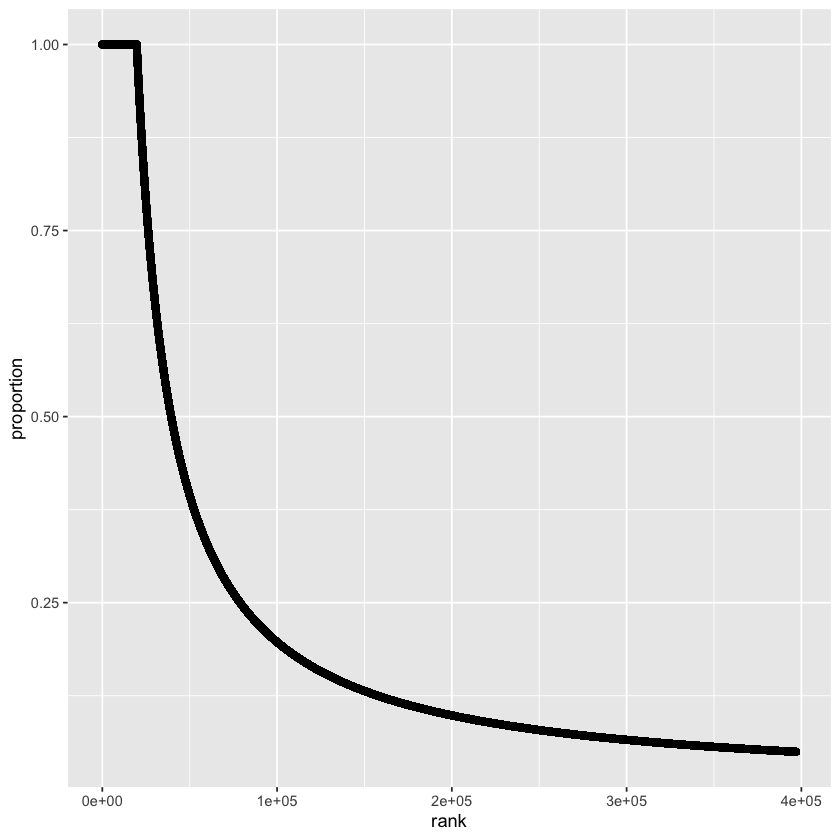

In [15]:
ggplot(res, aes(x = rank, y = proportion)) + geom_line() + geom_point()

In [16]:
missing_pred <- fread('missing_pred.csv')
missing_pred$sampleID <- gsub("_NCI60","",missing_pred$sampleID)
head(missing_pred)

featureID,sampleID,protein_intensity,measured,predprob,missing
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
A0AV96;A0AV96-2,X786O,26.95893,1,0.97,0.03
A0AV96;A0AV96-2,A498,28.67702,1,0.99,0.01
A0AV96;A0AV96-2,A549,29.12149,1,0.99,0.01
A0AV96;A0AV96-2,ACHN,29.22591,1,0.99,0.01
A0AV96;A0AV96-2,BT549,24.08905,1,0.86,0.14
A0AV96;A0AV96-2,CAKI1,27.47051,1,0.98,0.02


In [17]:
res2 <- merge(missing_pred, prot_samp_withRare, by = c('sampleID', 'featureID'), all=TRUE)
head(res2[is.na(res2$missing),])

sampleID,featureID,protein_intensity,measured,predprob,missing,rare
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
A498,A2RRD8,NA,NA,NA,NA,1
A498,A2RUS2-2;A2RUS2;A2RUS2-3,NA,NA,NA,NA,1
A498,A6NFY7,NA,NA,NA,NA,1
A498,A6NKF1;A6NKF1-2,NA,NA,NA,NA,1
A498,A7E2Y1-3,NA,NA,NA,NA,1
A498,CON__P13645;P13645;CON__Q7Z3Z0;Q7Z3Z0,NA,NA,NA,NA,1


In [18]:
res_impute <- merge(missing_pred, prot_samp_withRare, by = c('sampleID', 'featureID'), all.x=TRUE)
res_impute[is.na(res_impute$rare)]$rare <- 0
res_impute <- res_impute[order(missing, -rare),]
head(res_impute)

sampleID,featureID,protein_intensity,measured,predprob,missing,rare
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
A498,A5YKK6;A5YKK6-2;A5YKK6-3;A5YKK6-4,30.81444,1,1,0,1
A498,O00170,30.66231,1,1,0,1
A498,O14828;O14828-2,29.53749,1,1,0,1
A498,O75150;O75150-4;O75150-3,30.30150,1,1,0,1
A498,P02751;P02751-8;P02751-3;P02751-15;P02751-14;P02751-17;P02751-7;P02751-9;P02751-11;P02751-5;P02751-10;P02751-6;P02751-13;P02751-12;P02751-4;P02751-16;P02751-2,30.93493,1,1,0,1
A498,P11940;P11940-2;Q4VXU2;Q4VXU2-2,33.76398,1,1,0,1


In [19]:
res_impute$cumsum <- cumsum(res_impute$rare)
res_impute$rank = 1:nrow(res_impute)
res_impute$proportion <- res_impute$cumsum/res_impute$rank
head(res_impute)

sampleID,featureID,protein_intensity,measured,predprob,missing,rare,cumsum,rank,proportion
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
A498,A5YKK6;A5YKK6-2;A5YKK6-3;A5YKK6-4,30.81444,1,1,0,1,1,1,1
A498,O00170,30.66231,1,1,0,1,2,2,1
A498,O14828;O14828-2,29.53749,1,1,0,1,3,3,1
A498,O75150;O75150-4;O75150-3,30.30150,1,1,0,1,4,4,1
A498,P02751;P02751-8;P02751-3;P02751-15;P02751-14;P02751-17;P02751-7;P02751-9;P02751-11;P02751-5;P02751-10;P02751-6;P02751-13;P02751-12;P02751-4;P02751-16;P02751-2,30.93493,1,1,0,1,5,5,1
A498,P11940;P11940-2;Q4VXU2;Q4VXU2-2,33.76398,1,1,0,1,6,6,1


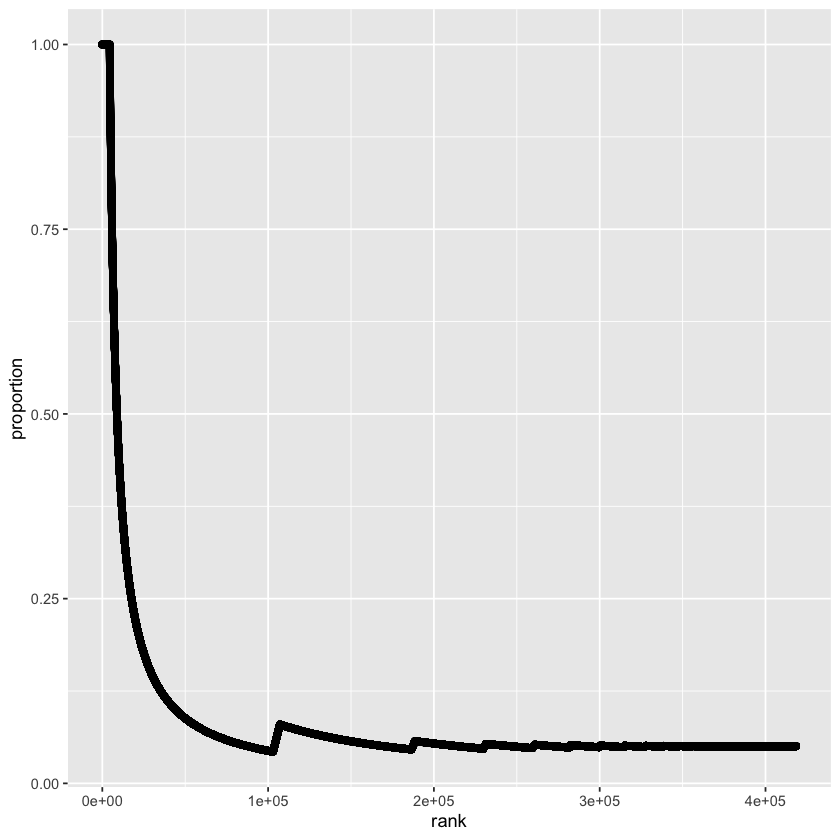

In [20]:
ggplot(res_impute, aes(rank, y = proportion)) + geom_line() + geom_point()

In [21]:
result <- merge(res[,6:7], res_impute[,9:10], by = "rank")
head(result)

rank,proportion.x,proportion.y
<int>,<dbl>,<dbl>
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1


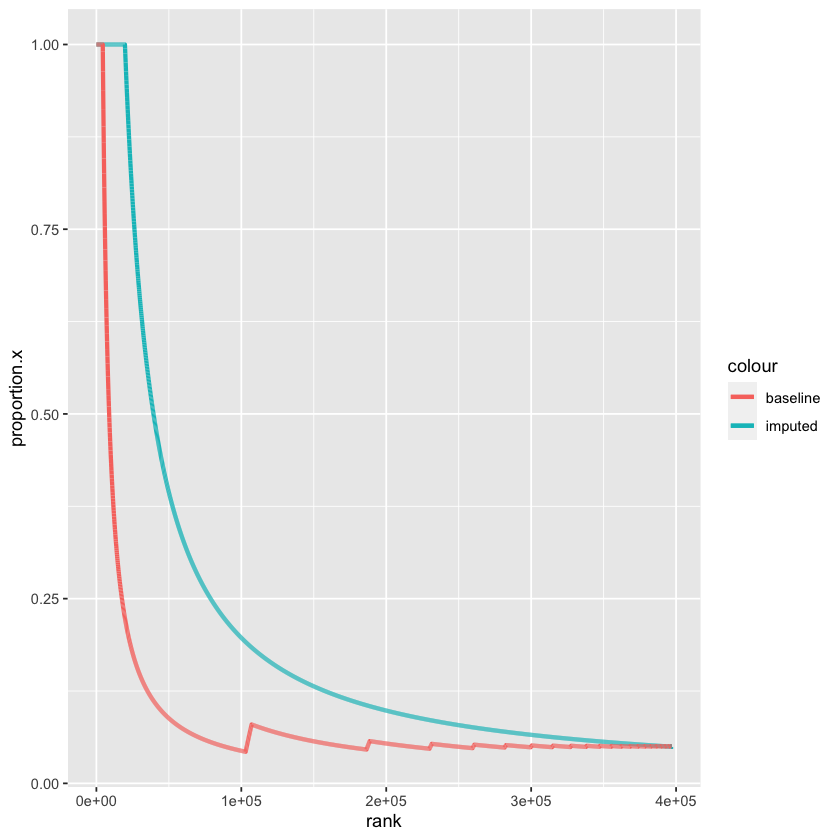

In [30]:
ggplot(result, aes(x = rank)) + geom_line(aes(y = proportion.x, colour = "imputed"), size = 1.2) +
    geom_line(aes(y = proportion.y, colour = "baseline"), size = 1.2) #+
    #xlim(100,40000)